In [85]:
import os
import re
import csv
import numpy as np


In [86]:
cwd = os.getcwd()

In [87]:
import pandas as pd
import matplotlib.pyplot as plt


# preapre CSV

In [88]:
# benchmark_path = "/Users/u7826985/Projects/Nvidia/results/composite_hadamard_optimization"
AA_folder ="1000taxa_diff_trees_100K_sites_AA"
# DNA_folder ="100taxa_diff_trees_1M_sites"

In [89]:
# last_results_path = "/Users/u7826985/Projects/Nvidia/results/2025_10_20_a100_vs_c100"
results_path = "/Users/u7826985/Projects/Nvidia/results/2026_02_10_h200_gpu"
output_csv = f"{results_path}/results.csv"
output_csv_aa = f"{results_path}/results_aa.csv"

In [90]:
# Regex to capture the RESULT line
pattern = re.compile(
    r"\[RESULT\]\s*backend=(\w+)\s+taxa=(\d+)\s+sites=(\d+)\s+patterns=(\d+)\s+time=([\d\.e\+\-]+)s\s+likelihood=([\-.\deE]+)"
)


In [91]:
#read files in results_path

def read_files_in_directory(directory, unique_name=""):
    for i in range(1, 11):
        tree_folder = f"{directory}/tree_{i}"
        files = os.listdir(tree_folder)
        for file in files:
            if file.endswith('.txt'):
                print(f"Reading file: {file}")
                with open(f'{tree_folder}/{file}', 'r') as f:
                    #get treefile name from the txt file name
                    tree_file_name = file.split("_")[4] + "_" + file.split("_")[5]
                    # detect file name contains "a100"
                    run_number = file.split("_")[3]
                    print(tree_file_name)
                    
                    h200 = False
                    a100 = False
                    transposed = False
                    if "h200" in file.split("_")[-1]:
                        h200 = True
                    
                    elif "a100" in file.split("_")[-1]:
                        a100 = True
                        continue
                        
                    for line in f:
                        match = pattern.search(line)
                        
                        if match:
                            print("found a match")
                            backend, taxa, sites, patterns, time, likelihood = match.groups()
                            print(backend)
                            if h200:
                                backend += "_H200"
                            elif a100:
                                backend += "_A100"
                            else:
                                backend += "_V100"
                           
                                
                            # if taxa != "100":
                            #     continue
                            backend += unique_name
                            data.append([backend, taxa, sites, patterns, likelihood, time, tree_file_name, run_number])
                            
                            print(backend, taxa, sites, patterns, likelihood, time, tree_file_name, run_number)
    
                            # Write to CSV
                            # with open(output_csv, 'w', newline='') as csvfile:
                            #     writer = csv.writer(csvfile)
                            #     writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
                            #     writer.writerows(data)

    print(f"Extracted {len(data)} results to {output_csv}")



In [92]:
alignment_pattern = re.compile(r"Alignment has (\d+) sequences with (\d+) columns, (\d+) distinct patterns")
likelihood_pattern = re.compile(r"Initial log-likelihood:\s+([-0-9.]+).*?took ([0-9.]+) wall-clock sec")

# Data list
# data = []


In [93]:
# Write to CSV

def write_to_csv(data, output_csv):
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time","treefile", "run_number"])
        writer.writerows(data)
        
        


In [94]:
def plot_average_time_per_backend(df, logy=False, path=""):
    groups = df.groupby(['treefile', 'backend'])
    mean_times = groups['time'].mean().unstack()
    mean_times.plot(kind='bar', figsize=(10, 5))
    if logy:
        plt.yscale('log')
    plt.xlabel('Tree File')
    plt.ylabel('Average Time (s)')
    plt.title('Average Time per Backend for Each Tree File')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()


def plot_boxplot_time_per_backend(df, logy=False, path=""):
    plt.figure(figsize=(10, 5))
    df.boxplot(column='time', by='backend')
    if logy:
        plt.yscale('log')
    plt.xlabel('Backend')
    plt.ylabel('Time (s)')
    plt.title('Time Distribution per Backend')
    plt.suptitle('')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()
    
def boxplot_per_tree_group_backend(df):
    # plot per tree file boxplot grouped by backend
    tree_files = df['treefile'].unique()
    for tree_file in tree_files:
        plt.figure(figsize=(10, 5))
        df_tree = df[df['treefile'] == tree_file]
        df_tree.boxplot(column='time', by='backend')
        plt.xlabel('Backend')
        plt.ylabel('Time (s)')
        plt.title(f'Time Distribution per Backend for {tree_file}')
        plt.suptitle('')
        plt.tight_layout()
        plt.show()

In [95]:
def plot_average_time_per_backend_v100(df, logy=False, path=""):
    # get only v100 backends
    df = df[df['backend'].str.contains('V100')]
    groups = df.groupby(['treefile', 'backend'])
    mean_times = groups['time'].mean().unstack()
    mean_times.plot(kind='bar', figsize=(10, 5))
    if logy:
        plt.yscale('log')
    plt.xlabel('Tree File')
    plt.ylabel('Average Time (s)')
    plt.title('Average Time per Backend for Each Tree File')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()



# Analysis of Results

In [96]:
data = []

In [97]:
# read_files_in_directory(f"{benchmark_path}/{AA_folder}", unique_name="_BENCHMARK")
read_files_in_directory(f"{results_path}/{AA_folder}", unique_name="_GPU")
# read_files_in_directory(f"{last_results_path}/{AA_folder}", unique_name="_OLDGPU")

write_to_csv(data, output_csv)

Reading file: output_openACC_h200_run8_tree_1_100000_aa_openacc_h200.txt
tree_1
found a match
OPENACC
OPENACC_H200_GPU 1000 100000 100000 -105549278.231747955083847 2.493405754000000 tree_1 run8
Reading file: output_openACC_a100_run2_tree_1_100000_aa_openacc_a100.txt
tree_1
Reading file: output_openACC_v100_run3_tree_1_100000_aa_openacc_v100.txt
tree_1
found a match
OPENACC
OPENACC_V100_GPU 1000 100000 100000 -105549278.231747955083847 1.512149240000000 tree_1 run3
Reading file: output_openACC_h200_run5_tree_1_100000_aa_openacc_h200.txt
tree_1
found a match
OPENACC
OPENACC_H200_GPU 1000 100000 100000 -105549278.231747955083847 1.807790762000000 tree_1 run5
Reading file: output_openACC_h200_run7_tree_1_100000_aa_openacc_h200.txt
tree_1
found a match
OPENACC
OPENACC_H200_GPU 1000 100000 100000 -105549278.231747955083847 3.148198902000000 tree_1 run7
Reading file: output_openACC_v100_run1_tree_1_100000_aa_openacc_v100.txt
tree_1
found a match
OPENACC
OPENACC_V100_GPU 1000 100000 100000 -1

In [98]:
# Read the CSV file into a DataFrame
df = pd.read_csv(output_csv)
# Display the first few rows of the DataFrame
df.head()

,backend,taxa,sites,patterns,likelihood,time,treefile,run_number
0,OPENACC_H200_GPU,1000,100000,100000,-1.055493e+08,2.493406,tree_1,run8
1,OPENACC_V100_GPU,1000,100000,100000,-1.055493e+08,1.512149,tree_1,run3
2,OPENACC_H200_GPU,1000,100000,100000,-1.055493e+08,1.807791,tree_1,run5
3,OPENACC_H200_GPU,1000,100000,100000,-1.055493e+08,3.148199,tree_1,run7
4,OPENACC_V100_GPU,1000,100000,100000,-1.055493e+08,1.514643,tree_1,run1


In [99]:
def plot_min_time_per_backend(df, logy=False, path=""):
    groups = df.groupby(['treefile', 'backend'])
    min_times = groups['time'].min().unstack()
    min_times.plot(kind='bar', figsize=(10, 5))
    if logy:
        plt.yscale('log')
    plt.xlabel('Tree File')
    plt.ylabel('Min Time (s)')
    plt.title('Minimum Time per Backend for Each Tree File')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()

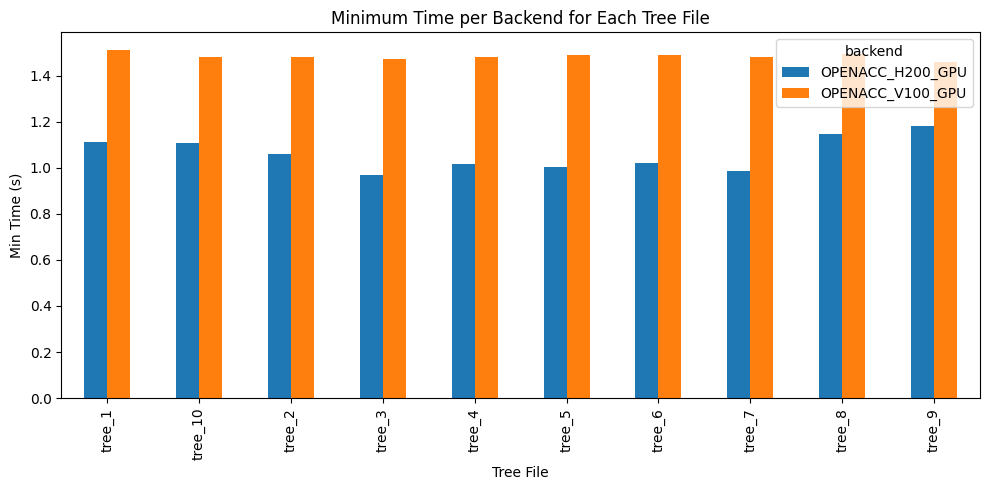

In [100]:
plot_min_time_per_backend(df, logy=False, path=f"{cwd}/average_time_per_backend_100taxa_diff_trees_1M_sites_AA.png")

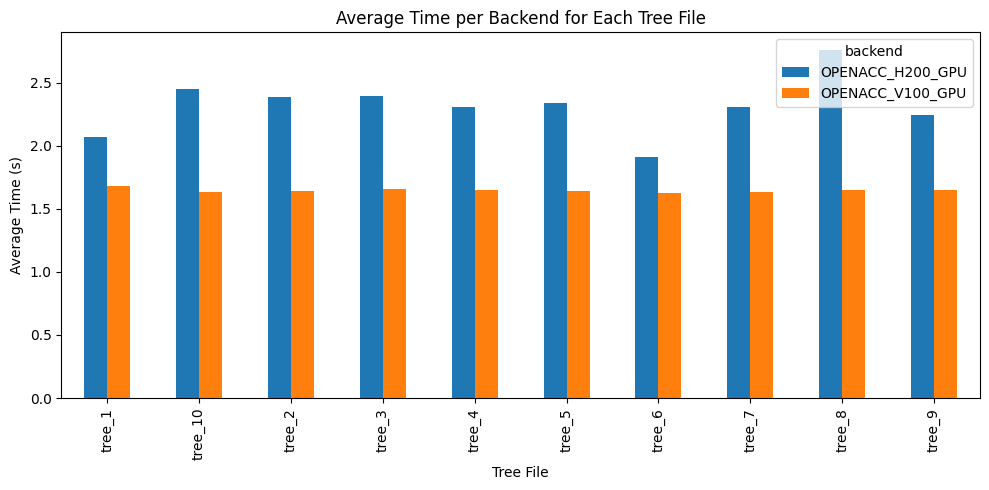

In [101]:
plot_average_time_per_backend(df, logy=False, path=f"{cwd}/average_time_per_backend_100taxa_diff_trees_1M_sites_AA.png")

In [107]:
def plot_max_time_per_backend(df, logy=False, path=""):
    groups = df.groupby(['treefile', 'backend'])
    max_times = groups['time'].max().unstack()
    max_times.plot(kind='bar', figsize=(10, 5))
    if logy:
        plt.yscale('log')
    plt.xlabel('Tree File')
    plt.ylabel('Max Time (s)')
    plt.title('Max Time per Backend for Each Tree File')
    plt.tight_layout()
    if path:
        plt.savefig(path)
    plt.show()

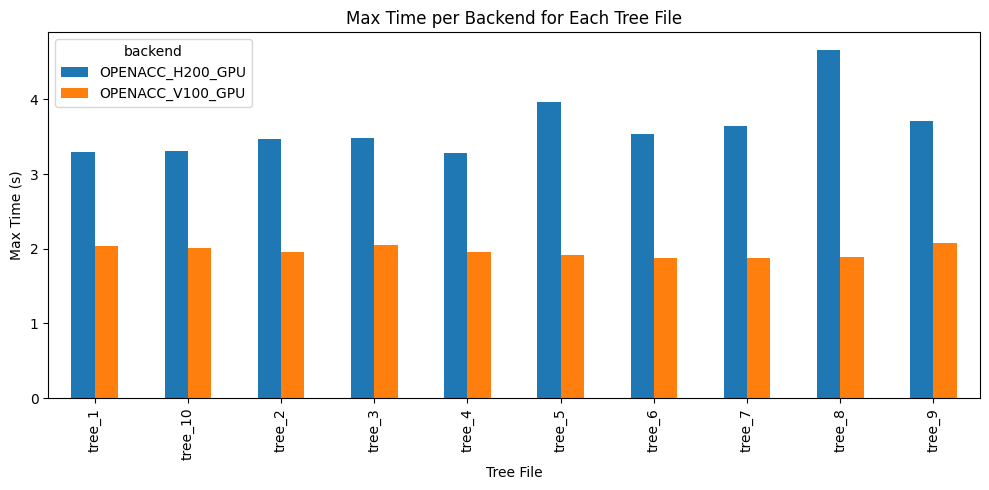

In [108]:

plot_max_time_per_backend(df, logy=False, path=f"{cwd}/average_time_per_backend_100taxa_diff_trees_1M_sites_AA.png")

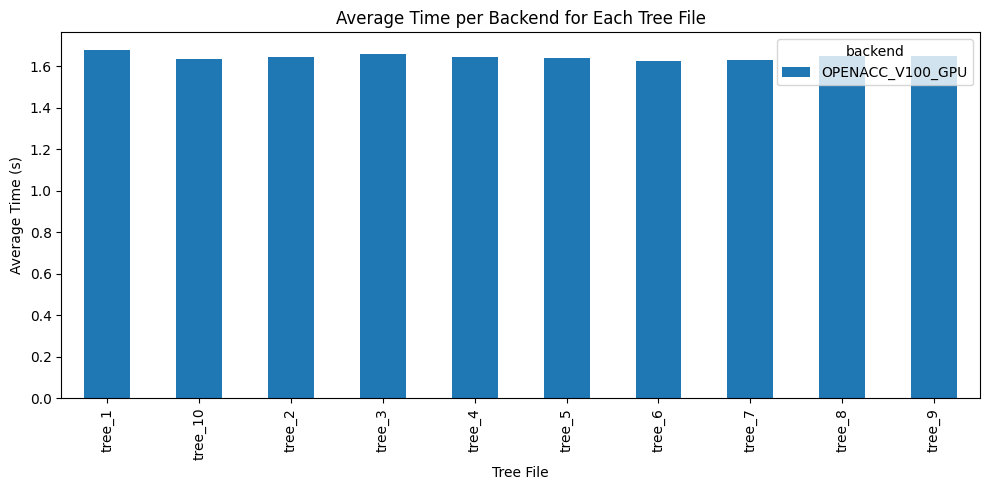

In [104]:
plot_average_time_per_backend_v100(df, logy=False, path=f"{cwd}/average_time_per_backend_v100_100taxa_diff_trees_1M_sites_AA.png")

<Figure size 1000x500 with 0 Axes>

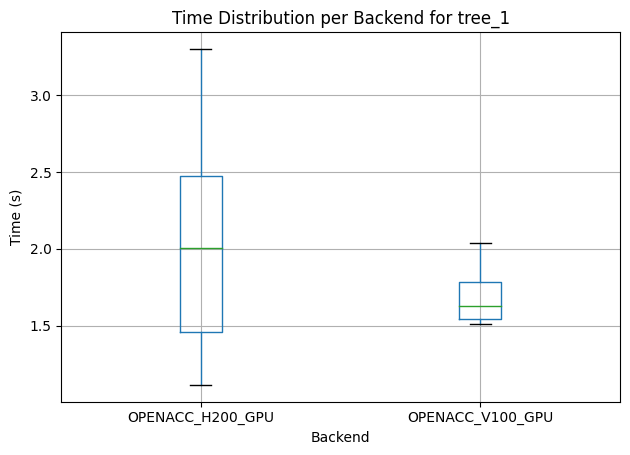

<Figure size 1000x500 with 0 Axes>

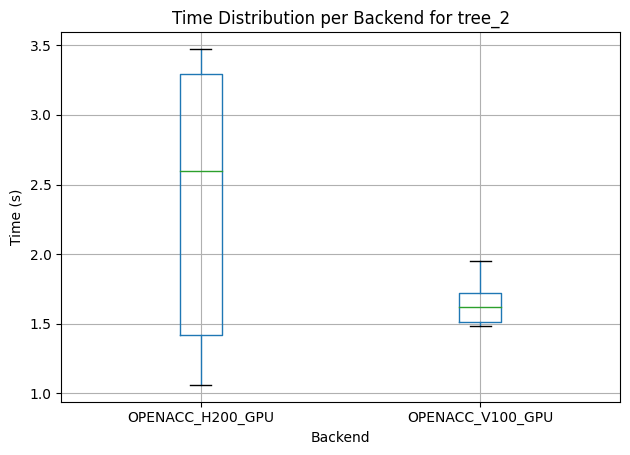

<Figure size 1000x500 with 0 Axes>

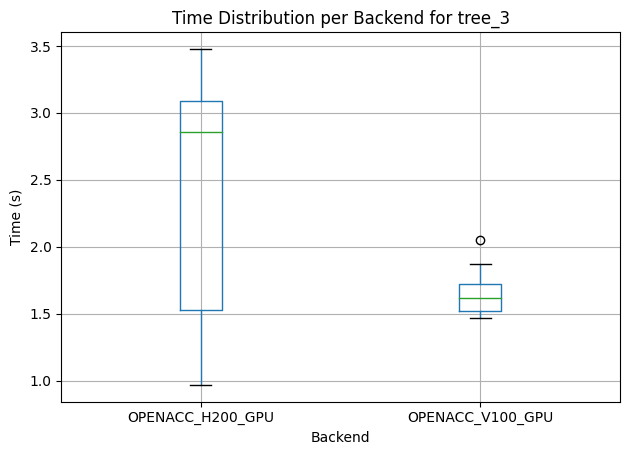

<Figure size 1000x500 with 0 Axes>

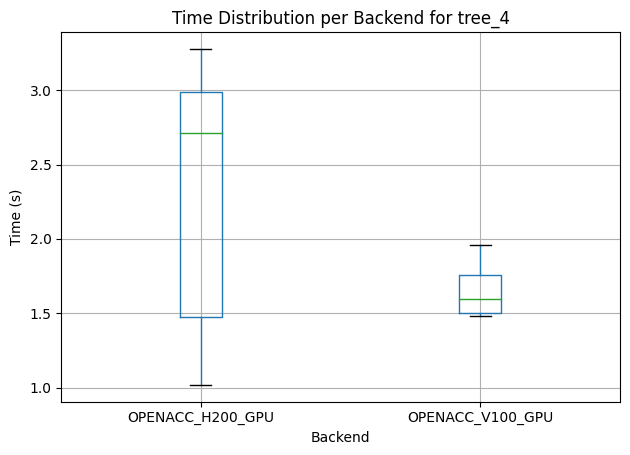

<Figure size 1000x500 with 0 Axes>

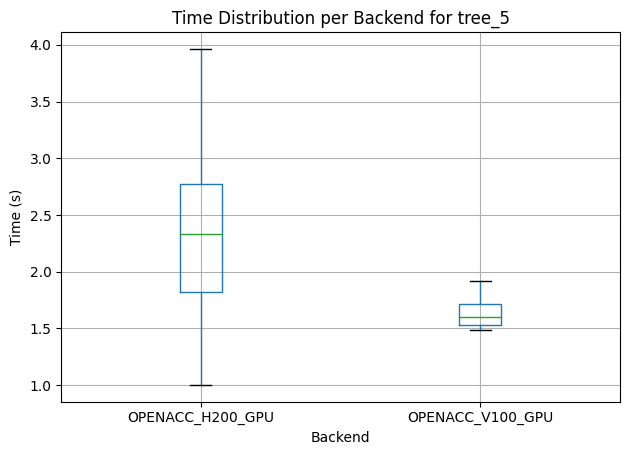

<Figure size 1000x500 with 0 Axes>

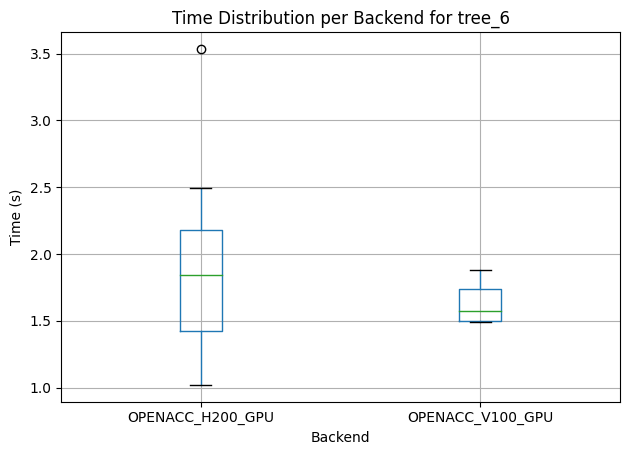

<Figure size 1000x500 with 0 Axes>

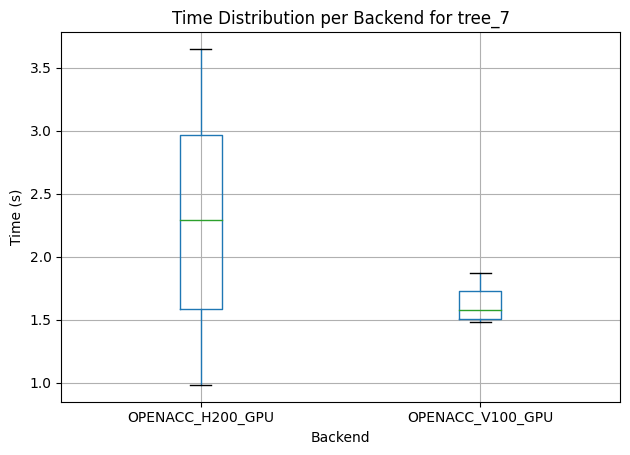

<Figure size 1000x500 with 0 Axes>

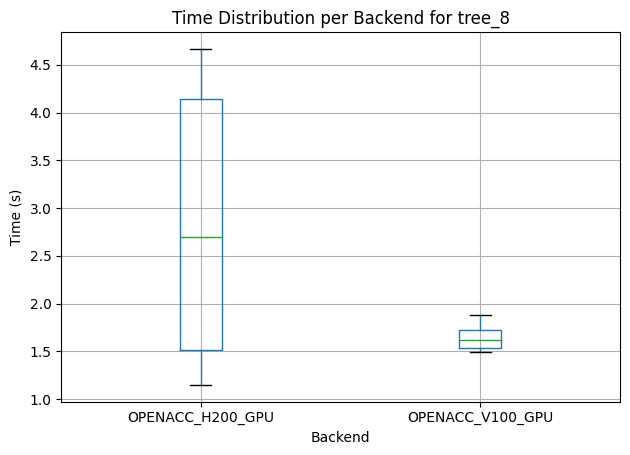

<Figure size 1000x500 with 0 Axes>

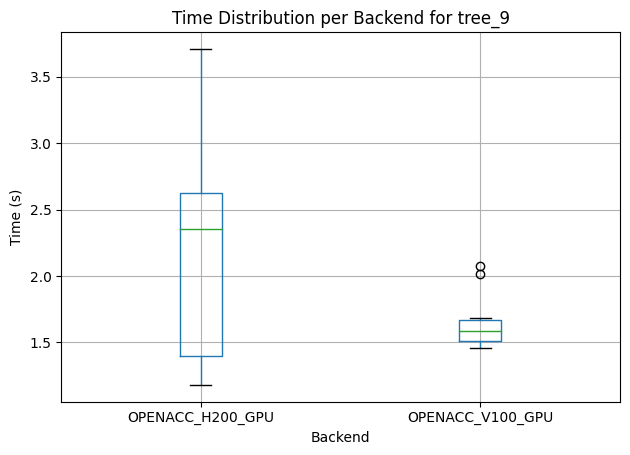

<Figure size 1000x500 with 0 Axes>

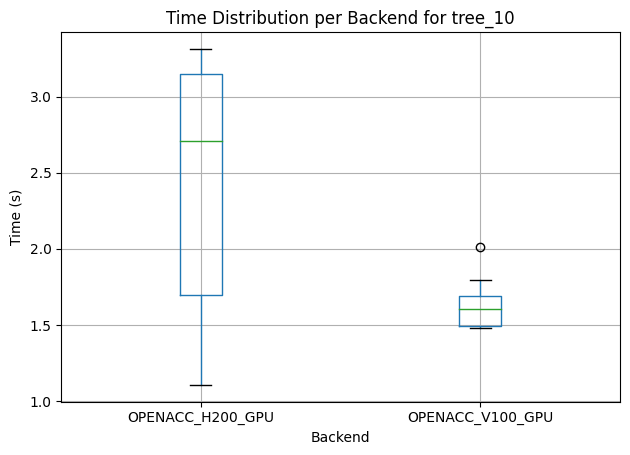

<Figure size 1000x500 with 0 Axes>

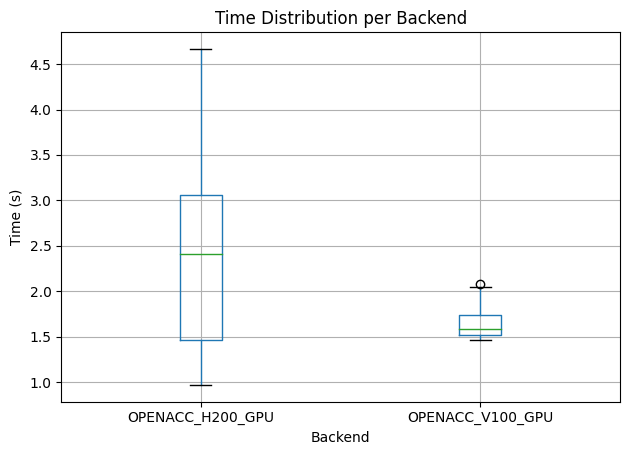

In [105]:
boxplot_per_tree_group_backend(df)
plot_boxplot_time_per_backend(df, logy=False, path=f"{cwd}/boxplot_time_per_backend_100taxa_diff_trees_1M_sites_AA.png")

In [106]:
data = []
read_files_in_directory(f"{results_path}/{DNA_folder}", unique_name="_GPU")
read_files_in_directory(f"{last_results_path}/{DNA_folder}", unique_name="_OLDGPU")
write_to_csv(data, output_csv_aa)
df = pd.read_csv(output_csv_aa)

plot_average_time_per_backend(df, logy=False, path=f"{cwd}/average_time_per_backend_100taxa_diff_trees_1M_sites_DNA.png")

NameError: name 'DNA_folder' is not defined

In [ ]:
plot_average_time_per_backend_v100(df, logy=False, path=f"{cwd}/average_time_per_backend_v100_100taxa_diff_trees_1M_sites_DNA.png")